In [25]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, wilcoxon
from statsmodels.stats.power import ttest_power
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
sample1 = pd.read_excel("SM4-Golf.xls")

In [27]:
#len(sample1)

In [54]:
#sample1['Current']

In [29]:
sample1.isna().sum()

Current    0
New        0
dtype: int64

In [30]:
sample1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [31]:
sample1.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


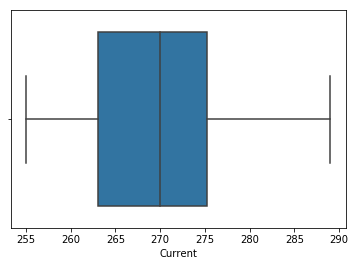

In [40]:
sns.boxplot(sample1['Current'])

In [52]:
# there are no outliers in the "Current" columnn of the Golf ball sample so we dont have to replace 
# any value with mean of the "Current" column

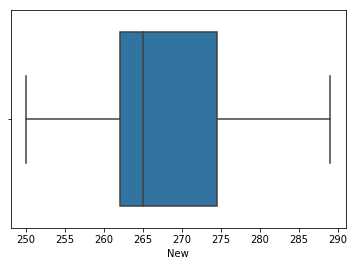

In [42]:
sns.boxplot(sample1['New']) 

In [91]:
# There are no outliers in the "New" column of the Golf ball sample so we don't have to replace any of the columns
# values with the mean of that particular column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202C5DE0198>,
      dtype=object)

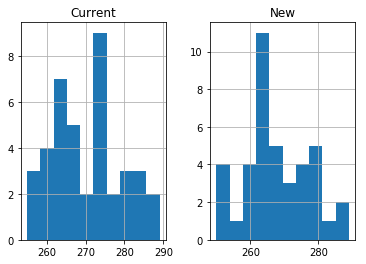

In [44]:
sample1.hist()

In [110]:
# the distribution for the "Current" and the "New" column of the sample1 dataset does not seem 
# to be a normal distribution so both parametric and non parametric tests will be done to test the hypothesis

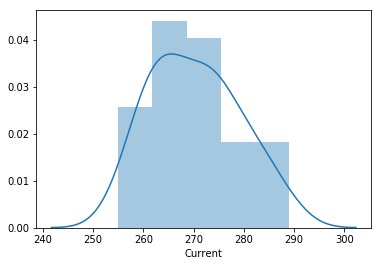

In [100]:
sns.distplot(sample1["Current"])

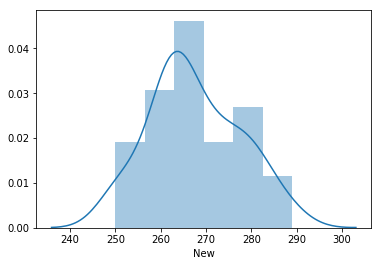

In [49]:
sns.distplot(sample1["New"])

In [53]:
# again both the above distributions are not well defined i.e symmetric normal distribution so both 
# parametric and non-parametric tests have to be done

In [87]:
# Now we do the shapiro test to see if the samples are normaly distributed

In [88]:
shapiro(sample1["Current"])

(0.9707046747207642, 0.378787100315094)

In [92]:
# For the "Current" column, the p value is much larger than the alpha value which is 0.05 , 
# we keep the null hypothesis that the distribution is normal

In [95]:
shapiro(sample1["New"])

(0.9678263664245605, 0.3064655363559723)

In [94]:
# For the "New" column also the p value is much larger than the alpha value which is 0.05 , 
# so we keep the null hypothesis that the distribution is normal

In [111]:
# We set the null hypothesis to be that the new ball has better performance i.e it has a better 
# driving distance than the old one. 
# Let's assume that the distribution for the driving distance for both balls have
# the same variance and that the distributions 
# for the driving distance for the old and new balls are normal which we conclude from the shapiro test.

In [72]:
t_statistics, p_value = ttest_ind(sample1["New"],sample1["Current"])

In [73]:
print(t_statistics, p_value)

-1.3283615935245678 0.18793228491854663


In [ ]:
# in the above case the t statistics is less than 1.6848 which is the critical t value for  alpha  = 0.05, 
# so we do not reject the null hypothesis and retain it. Also the p value is much higher than the alpha value 
# which is 0.05 so we retain our null hypothesis that the new golf ball is better performing that the old one.

In [62]:
# if we consider the distribution to be non parametic then we will use the mannwhitneyu package from pyhton
# i.e we do non parametric test.

In [74]:
w, p_value = mannwhitneyu(sample1["New"],sample1["Current"])

In [75]:
print(w,p_value)

668.0 0.10265192122893124


In [76]:
# Here also the p value is higher than 0.05 so we accept the null hypothesis that the new ball is better 
# performing than the old one.

In [77]:
#Now let's look at the one sample t test for both the samples.

In [79]:
t_statistics, p_value = ttest_1samp(sample1["New"]-sample1["Current"],0)

In [80]:
print(t_statistics, p_value)

-1.2769699827911767 0.20916361823147053


In [81]:
# Here again the p value is much higher that 0.05 so we keep the null hypothesis.

In [82]:
# again using wilcoxon test assuming that the distribution is non-parametric.

In [83]:
z_statistics, p_value = wilcoxon(sample1["New"]-sample1["Current"])

In [84]:
print(z_statistics,p_value)

291.5 0.2516033447950283


In [86]:
# Here again the p value is much higher than 0.05 so we keep the null hypothesis that the
# new ball is better performing than the old one.

In [96]:
# We now test the difference of variance for the "Current" and "New" samples using levene.

In [97]:
levene(sample1["Current"],sample1["New"])

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

In [101]:
# in the above case the p value is much larger than the alpha value which is 0.05 so we keep the null
# hypothesis in this case the variance of the population for both the samples may not be much different.

In [98]:
# Now we calculate the power of test

In [102]:
# we first calculate the pooled standard deviation

In [106]:
(np.mean(sample1["New"]) - np.mean(sample1["Current"]))/(np.sqrt((40-1)*np.var(sample1["Current"]) + (40-1)*np.var(sample1["New"]))/(40+40-2))

-2.656723187049135

In [108]:
ttest_p = ttest_power(2.657,nobs = 40, alpha = 0.05, alternative = "two-sided")

In [109]:
ttest_p

1.0

In [ ]:
# the power of test is 1, means that the beta value is zero which means that the probability 
# of us retaining a null hypothesis when it false is zero i.e we always retain the null hypothesis that the new ball
# is better performing that the old one with 100% chance.